## Group 7
## Big Data Group Project

### Contributors:
- 29233798: Joel Shien Yee Chin [Joel]
- 18435688: Tim O'Doherty [Tim]
- 22606127: Sean Whitehead [Sean]
- 29650437: Lin Bai [Lin]


### Phase 2: Cleansing and Reshaping

This notebook is used for co-developing of codes required to wrangle the home credit risk dataset.

Please use this notebook as the live version and download local copies as you require.

If you have picked up a specific section, please comment your name to the code cell so that we can work on other sections.

Helpful link for Dataframes in Scala:
- https://docs.databricks.com/spark/latest/dataframes-datasets/introduction-to-dataframes-scala.html#work-with-dataframes
- https://spark.apache.org/docs/1.5.0/api/java/overview-summary.html
- https://spark.apache.org/docs/2.2.0/sql-programming-guide.html
- https://www.tutorialspoint.com/scala/
- http://allaboutscala.com/big-data/spark/#dataframe-select-columns

Insert libraries into the cell below:

In [1]:
import org.apache.spark.sql.functions._
import org.apache.spark.sql.types._
import org.apache.spark.sql._
import org.apache.hadoop.io.LongWritable
import org.apache.hadoop.io.Text
import org.apache.hadoop.conf.Configuration
import org.apache.hadoop.mapreduce.lib.input.TextInputFormat
import org.apache.spark.sql.functions.{sum, col}
import org.apache.spark.sql.functions.{col, count, when}
import org.apache.spark.sql.functions._
import org.apache.spark.sql.types.IntegerType

Intitializing Scala interpreter ...

Spark Web UI available at http://cc339d981ce2:4041
SparkContext available as 'sc' (version = 2.4.3, master = local[*], app id = local-1559989022485)
SparkSession available as 'spark'


2019-06-08 10:16:58,931 WARN  [main] util.NativeCodeLoader (NativeCodeLoader.java:<clinit>(62)) - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
2019-06-08 10:17:01,953 WARN  [Thread-4] util.Utils (Logging.scala:logWarning(66)) - Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


import org.apache.spark.sql.functions._
import org.apache.spark.sql.types._
import org.apache.spark.sql._
import org.apache.hadoop.io.LongWritable
import org.apache.hadoop.io.Text
import org.apache.hadoop.conf.Configuration
import org.apache.hadoop.mapreduce.lib.input.TextInputFormat
import org.apache.spark.sql.functions.{sum, col}
import org.apache.spark.sql.functions.{col, count, when}
import org.apache.spark.sql.functions._
import org.apache.spark.sql.types.IntegerType


Insert code for data loading below:

Download zip from GDrive and extract to location where you are running notebook for below to run

In [2]:
//read in csv [Sean]
val creditRiskdf1 = spark.read.option("header","true").csv("Home credit default risk after feature selection/m_train_small.csv")

creditRiskdf1: org.apache.spark.sql.DataFrame = [EXT_SOURCE_1: string, EXT_SOURCE_2: string ... 359 more fields]


In [3]:
//take a look at features in dataset (...361 of them) [Sean]
creditRiskdf1.printSchema()

root
 |-- EXT_SOURCE_1: string (nullable = true)
 |-- EXT_SOURCE_2: string (nullable = true)
 |-- EXT_SOURCE_3: string (nullable = true)
 |-- client_installments_AMT_PAYMENT_min_sum: string (nullable = true)
 |-- DAYS_BIRTH: string (nullable = true)
 |-- AMT_CREDIT: string (nullable = true)
 |-- AMT_ANNUITY: string (nullable = true)
 |-- DAYS_EMPLOYED: string (nullable = true)
 |-- bureau_DAYS_CREDIT_ENDDATE_max: string (nullable = true)
 |-- bureau_DAYS_CREDIT_max: string (nullable = true)
 |-- DAYS_ID_PUBLISH: string (nullable = true)
 |-- bureau_AMT_CREDIT_MAX_OVERDUE_mean: string (nullable = true)
 |-- bureau_DAYS_ENDDATE_FACT_max: string (nullable = true)
 |-- bureau_AMT_CREDIT_SUM_DEBT_mean: string (nullable = true)
 |-- OWN_CAR_AGE: string (nullable = true)
 |-- previous_loans_CNT_PAYMENT_mean: string (nullable = true)
 |-- client_cash_CNT_INSTALMENT_FUTURE_min_max: string (nullable = true)
 |-- previous_loans_SELLERPLACE_AREA_max: string (nullable = true)
 |-- DAYS_LAST_PHONE_C

 |-- client_installments_NUM_INSTALMENT_NUMBER_mean_min: string (nullable = true)
 |-- client_bureau_balance_STATUS_C_count_mean: string (nullable = true)
 |-- client_installments_NUM_INSTALMENT_NUMBER_sum_min: string (nullable = true)
 |-- client_credit_CNT_DRAWINGS_CURRENT_max_sum: string (nullable = true)
 |-- client_credit_AMT_PAYMENT_CURRENT_sum_sum: string (nullable = true)
 |-- previous_loans_NAME_PORTFOLIO_XNA_count_norm: string (nullable = true)
 |-- previous_loans_NAME_CLIENT_TYPE_Repeater_count_norm: string (nullable = true)
 |-- previous_loans_NAME_SELLER_INDUSTRY_Connectivity_count_norm: string (nullable = true)
 |-- bureau_CREDIT_TYPE_Credit card_count: string (nullable = true)
 |-- client_credit_AMT_CREDIT_LIMIT_ACTUAL_sum_sum: string (nullable = true)
 |-- previous_loans_NAME_CONTRACT_STATUS_Canceled_count_norm: string (nullable = true)
 |-- client_bureau_balance_STATUS_0_count_norm_max: string (nullable = true)
 |-- OCCUPATION_TYPE_Drivers: string (nullable = true)
 |-

 |-- previous_loans_PRODUCT_COMBINATION_Card Street_count_norm: string (nullable = true)
 |-- client_installments_NUM_INSTALMENT_NUMBER_max_min: string (nullable = true)
 |-- client_credit_AMT_PAYMENT_CURRENT_min_sum: string (nullable = true)
 |-- previous_loans_PRODUCT_COMBINATION_POS industry without interest_count_norm: string (nullable = true)
 |-- previous_loans_CHANNEL_TYPE_Regional / Local_count: string (nullable = true)
 |-- ORGANIZATION_TYPE_Transport: type 3: string (nullable = true)
 |-- client_cash_NAME_CONTRACT_STATUS_Returned to the store_count_norm_max: string (nullable = true)
 |-- ORGANIZATION_TYPE_School: string (nullable = true)
 |-- previous_loans_NAME_TYPE_SUITE_Other_B_count_norm: string (nullable = true)
 |-- bureau_CNT_CREDIT_PROLONG_mean: string (nullable = true)
 |-- client_credit_AMT_DRAWINGS_CURRENT_max_max: string (nullable = true)
 |-- client_bureau_balance_MONTHS_BALANCE_max_sum: string (nullable = true)
 |-- client_cash_NAME_CONTRACT_STATUS_Active_count_

In [4]:
//string array of features to pass through EDA functions [Sean]
val creditRiskFeatures = creditRiskdf1.columns

creditRiskFeatures: Array[String] = Array(EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, client_installments_AMT_PAYMENT_min_sum, DAYS_BIRTH, AMT_CREDIT, AMT_ANNUITY, DAYS_EMPLOYED, bureau_DAYS_CREDIT_ENDDATE_max, bureau_DAYS_CREDIT_max, DAYS_ID_PUBLISH, bureau_AMT_CREDIT_MAX_OVERDUE_mean, bureau_DAYS_ENDDATE_FACT_max, bureau_AMT_CREDIT_SUM_DEBT_mean, OWN_CAR_AGE, previous_loans_CNT_PAYMENT_mean, client_cash_CNT_INSTALMENT_FUTURE_min_max, previous_loans_SELLERPLACE_AREA_max, DAYS_LAST_PHONE_CHANGE, bureau_AMT_CREDIT_SUM_max, bureau_AMT_CREDIT_SUM_mean, DAYS_REGISTRATION, client_installments_DAYS_INSTALMENT_max_max, previous_loans_AMT_DOWN_PAYMENT_max, CODE_GENDER_F, REGION_POPULATION_RELATIVE, client_cash_CNT_INSTALMENT_max_mean, bureau_DAYS_CREDIT_UPDATE_max, bureau_AMT_CREDIT_SUM_sum, clie...

In [5]:
//ID col summary (min to max) & number of rows [Sean]
creditRiskdf1.describe(creditRiskFeatures(360)).show()

+-------+------------------+
|summary|        SK_ID_CURR|
+-------+------------------+
|  count|            307511|
|   mean|278180.51857657125|
| stddev| 102790.1753484249|
|    min|            100002|
|    max|            456255|
+-------+------------------+



## Split and allocate features for data cleaning task execution

### As the full dataset is big, the codes require significant processing time and therefore are not conducive for review by the teaching team.  From here on, the codes will be run using a subset of the main dataset for the purpose of demonstrating functionality. Note that the data cleansing was performed on the full dataset and yielded 3 cleansed dataset (see report).

In [11]:
//subset of main dataset with 10% of rows [Sean]
//SUBSET OF MAIN DATA USED TO SHOW HOW CODE WORKS & COMPUTE IN A MORE TIMELY MANNER
//FOR ACTUAL DATA PREPARATION REMOVE THIS LINE AND RE-RUN NOTEBOOK
val creditRiskdf = creditRiskdf1.sample(false, 0.1)
val creditRiskFeatures = creditRiskdf.columns

creditRiskdf: org.apache.spark.sql.Dataset[org.apache.spark.sql.Row] = [EXT_SOURCE_1: string, EXT_SOURCE_2: string ... 359 more fields]
creditRiskFeatures: Array[String] = Array(EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, client_installments_AMT_PAYMENT_min_sum, DAYS_BIRTH, AMT_CREDIT, AMT_ANNUITY, DAYS_EMPLOYED, bureau_DAYS_CREDIT_ENDDATE_max, bureau_DAYS_CREDIT_max, DAYS_ID_PUBLISH, bureau_AMT_CREDIT_MAX_OVERDUE_mean, bureau_DAYS_ENDDATE_FACT_max, bureau_AMT_CREDIT_SUM_DEBT_mean, OWN_CAR_AGE, previous_loans_CNT_PAYMENT_mean, client_cash_CNT_INSTALMENT_FUTURE_min_max, previous_loans_SELLERPLACE_AREA_max, DAYS_LAST_PHONE_CHANGE, bureau_AMT_CREDIT_SUM_max, bureau_AMT_CREDIT_SUM_mean, DAYS_REGISTRATION, client_installments_DAYS_INSTALMENT_max_max, previous_loans_AMT_DOWN_PAYMENT_max, CODE_G...

In [12]:
//split and allocate features for down stream cleaning [Sean]
var creditRiskFeatures1 = creditRiskFeatures.slice(0,120)
var creditRiskFeatures2 = creditRiskFeatures.slice(121,240)
var creditRiskFeatures3 = creditRiskFeatures.slice(241,360)
//create partitioned DFs for downstream cleaning [Sean]
//unpack array of column headers as strings
var creditRiskPartition1 = creditRiskdf.select(creditRiskFeatures1.head, creditRiskFeatures1.tail: _*)
var creditRiskPartition2 = creditRiskdf.select(creditRiskFeatures2.head, creditRiskFeatures2.tail: _*)
var creditRiskPartition3 = creditRiskdf.select(creditRiskFeatures3.head, creditRiskFeatures3.tail: _*)

creditRiskFeatures1: Array[String] = Array(EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, client_installments_AMT_PAYMENT_min_sum, DAYS_BIRTH, AMT_CREDIT, AMT_ANNUITY, DAYS_EMPLOYED, bureau_DAYS_CREDIT_ENDDATE_max, bureau_DAYS_CREDIT_max, DAYS_ID_PUBLISH, bureau_AMT_CREDIT_MAX_OVERDUE_mean, bureau_DAYS_ENDDATE_FACT_max, bureau_AMT_CREDIT_SUM_DEBT_mean, OWN_CAR_AGE, previous_loans_CNT_PAYMENT_mean, client_cash_CNT_INSTALMENT_FUTURE_min_max, previous_loans_SELLERPLACE_AREA_max, DAYS_LAST_PHONE_CHANGE, bureau_AMT_CREDIT_SUM_max, bureau_AMT_CREDIT_SUM_mean, DAYS_REGISTRATION, client_installments_DAYS_INSTALMENT_max_max, previous_loans_AMT_DOWN_PAYMENT_max, CODE_GENDER_F, REGION_POPULATION_RELATIVE, client_cash_CNT_INSTALMENT_max_mean, bureau_DAYS_CREDIT_UPDATE_max, bureau_AMT_CREDIT_SUM_sum, cli...

## flagging missing values:

Since it is an aggregate notebook and the filtering process is very time consuming to run, the output in this section with the exact same code and df can be seen in the screenshots in the report.

In [ ]:
//create DF of features & count of nulls
//set threshold e.g if over 30% of values = null, drop column
//Drop rows with null
//sum count of int for null values [Lin]

In [8]:
val df = creditRiskdf1

df: org.apache.spark.sql.DataFrame = [EXT_SOURCE_1: string, EXT_SOURCE_2: string ... 359 more fields]


In [26]:
df.count()

res12: Long = 307511


Check the percentage of NotNull value of each column:

In [9]:
val df4=df.select(df.columns.map(c => (count(c) / count("*")).alias(c)): _*)

df4: org.apache.spark.sql.DataFrame = [EXT_SOURCE_1: double, EXT_SOURCE_2: double ... 359 more fields]


In [ ]:
df4.show()

Check the count of null value in each column:

In [10]:
//df.select(df.columns.map(c => sum(col(c).isNull.cast("int")).alias(c)): _*).show
val df3=df.select(df.columns.map(c => sum(col(c).isNull.cast("int")).alias(c)): _*)

df3: org.apache.spark.sql.DataFrame = [EXT_SOURCE_1: bigint, EXT_SOURCE_2: bigint ... 359 more fields]


In [ ]:
df3.show()

Or: Express the count of null value in each column in forms of array:

In [11]:
df.cache()

res2: df.type = [EXT_SOURCE_1: string, EXT_SOURCE_2: string ... 359 more fields]


In [12]:
val col= df.columns
var dfArray=col.map(colmn=>df.select(lit(colmn).as("colName"),sum(when(df(colmn).isNull,1).otherwise(0)).as("missingValues")))
dfArray.tail.foldLeft(dfArray.head)((acc,itr)=>acc.union(itr)).show

2019-05-27 14:04:57,396 WARN  [Thread-4] util.Utils (Logging.scala:logWarning(66)) - Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.debug.maxToStringFields' in SparkEnv.conf.
2019-05-27 14:50:58,213 WARN  [netty-rpc-env-timeout] netty.NettyRpcEnv (Logging.scala:logWarning(66)) - Ignored failure: java.util.concurrent.TimeoutException: Cannot receive any reply from 82a2456298de:44969 in 10000 milliseconds
2019-05-27 14:51:34,619 WARN  [driver-heartbeater] executor.Executor (Logging.scala:logWarning(87)) - Issue communicating with driver in heartbeater
org.apache.spark.rpc.RpcTimeoutException: Futures timed out after [10000 milliseconds]. This timeout is controlled by spark.executor.heartbeatInterval
	at org.apache.spark.rpc.RpcTimeout.org$apache$spark$rpc$RpcTimeout$$createRpcTimeoutException(RpcTimeout.scala:47)
	at org.apache.spark.rpc.RpcTimeout$$anonfun$addMessageIfTimeout$1.applyOrElse(RpcTimeout.scala:62)
	at or

2019-05-27 14:56:07,437 WARN  [heartbeat-receiver-event-loop-thread] netty.NettyRpcEnv (Logging.scala:logWarning(66)) - Ignored message: HeartbeatResponse(false)
2019-05-27 14:56:24,352 WARN  [driver-heartbeater] executor.Executor (Logging.scala:logWarning(87)) - Issue communicating with driver in heartbeater
org.apache.spark.rpc.RpcTimeoutException: Futures timed out after [10000 milliseconds]. This timeout is controlled by spark.executor.heartbeatInterval
	at org.apache.spark.rpc.RpcTimeout.org$apache$spark$rpc$RpcTimeout$$createRpcTimeoutException(RpcTimeout.scala:47)
	at org.apache.spark.rpc.RpcTimeout$$anonfun$addMessageIfTimeout$1.applyOrElse(RpcTimeout.scala:62)
	at org.apache.spark.rpc.RpcTimeout$$anonfun$addMessageIfTimeout$1.applyOrElse(RpcTimeout.scala:58)
	at scala.runtime.AbstractPartialFunction.apply(AbstractPartialFunction.scala:36)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:76)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:92

2019-05-27 14:58:45,195 WARN  [heartbeat-receiver-event-loop-thread] netty.NettyRpcEnv (Logging.scala:logWarning(66)) - Ignored message: HeartbeatResponse(false)
2019-05-27 14:58:53,137 WARN  [driver-heartbeater] executor.Executor (Logging.scala:logWarning(87)) - Issue communicating with driver in heartbeater
org.apache.spark.rpc.RpcTimeoutException: Futures timed out after [10000 milliseconds]. This timeout is controlled by spark.executor.heartbeatInterval
	at org.apache.spark.rpc.RpcTimeout.org$apache$spark$rpc$RpcTimeout$$createRpcTimeoutException(RpcTimeout.scala:47)
	at org.apache.spark.rpc.RpcTimeout$$anonfun$addMessageIfTimeout$1.applyOrElse(RpcTimeout.scala:62)
	at org.apache.spark.rpc.RpcTimeout$$anonfun$addMessageIfTimeout$1.applyOrElse(RpcTimeout.scala:58)
	at scala.runtime.AbstractPartialFunction.apply(AbstractPartialFunction.scala:36)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:76)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:92

2019-05-27 15:01:32,120 WARN  [heartbeat-receiver-event-loop-thread] netty.NettyRpcEnv (Logging.scala:logWarning(66)) - Ignored message: HeartbeatResponse(false)
2019-05-27 15:01:32,125 WARN  [heartbeat-receiver-event-loop-thread] netty.NettyRpcEnv (Logging.scala:logWarning(66)) - Ignored message: HeartbeatResponse(false)
2019-05-27 15:01:32,116 WARN  [Executor task launch worker for task 8] storage.BlockManager (Logging.scala:logWarning(66)) - Block rdd_17_1 could not be removed as it was not found on disk or in memory
2019-05-27 15:01:32,196 ERROR [Executor task launch worker for task 8] executor.Executor (Logging.scala:logError(91)) - Exception in task 1.0 in stage 3.0 (TID 8)
java.lang.OutOfMemoryError: Java heap space
	at scala.collection.mutable.ResizableArray$class.ensureSize(ResizableArray.scala:103)
	at scala.collection.mutable.ArrayBuffer.ensureSize(ArrayBuffer.scala:48)
	at scala.collection.mutable.ArrayBuffer.$plus$eq(ArrayBuffer.scala:84)
	at org.apache.spark.sql.execution

2019-05-27 15:01:32,489 ERROR [task-result-getter-0] scheduler.TaskSetManager (Logging.scala:logError(70)) - Task 1 in stage 3.0 failed 1 times; aborting job
2019-05-27 15:01:33,822 WARN  [Executor task launch worker for task 9] storage.BlockManager (Logging.scala:logWarning(66)) - Putting block rdd_17_2 failed due to exception org.apache.spark.TaskKilledException.
2019-05-27 15:01:33,823 WARN  [Executor task launch worker for task 9] storage.BlockManager (Logging.scala:logWarning(66)) - Block rdd_17_2 could not be removed as it was not found on disk or in memory
2019-05-27 15:01:33,862 ERROR [dispatcher-event-loop-1] scheduler.TaskSchedulerImpl (Logging.scala:logError(91)) - Exception in statusUpdate
java.util.concurrent.RejectedExecutionException: Task org.apache.spark.scheduler.TaskResultGetter$$anon$4@492b7ef rejected from java.util.concurrent.ThreadPoolExecutor@3b1e5766[Terminated, pool size = 0, active threads = 0, queued tasks = 0, completed tasks = 9]
	at java.util.concurrent.T

org.apache.spark.SparkException:  Job aborted due to stage failure: Task 1 in stage 3.0 failed 1 times, most recent failure: Lost task 1.0 in stage 3.0 (TID 8, localhost, executor driver): java.lang.OutOfMemoryError: Java heap space

From the above outcome we can see that there are lots of columns with a big portion of null value.
But if we remove all rows containing 'null', there would be only 800+ rows and 300+columns left, far from enought for
the following steps.

Hence we set a threshold as 92253, which is 30% of the number of total rows. And set a pipeline to select the columns 
in which the null counts is less than 92253, in other words, less than 30% of the column is emply.

In [ ]:
val null_thresh = 92253 //or we can use 0.3*length(dataframe) if we are using a subset instead of the fulldata.             

val to_keep = df.columns.filter(
    c => df.agg(
        sum(when(df(c).isNull, 1).otherwise(0)).alias(c)
    ).first().getLong(0) <= null_thresh
)

//df.select(to_keep.head, to_keep.tail: _*).show()

In [ ]:
val df5=df.select(to_keep.head, to_keep.tail: _*)

In [ ]:
df5.count()

We can see that there are 283 columns left and 307511 rows left

Now we can try to drop the null rows and see what we've got:

In [ ]:
val df6=df5.na.drop()
df6.count()

## flagging duplicate values:

In [ ]:
//because the data has already been transformed & normalised use the IDCol (ARRindex:360) to check dupes

In [ ]:
df6.dropDuplicates("SK_ID_CURR").count()

We can see that there are no duplicate rows in this dataframe. 
We end up with 183875 rows and 283 columns.

Now write our dataframe in a csv file:

In [ ]:
// df6.write.option("header", "true").csv("m_train_small_5.csv")

In [ ]:
// transfer output of missing and duplicate values work back to main dataframe
val creditRiskdf = df6

## displaying outliers:

In [ ]:
//write function to check if there are any outliers in a given domain and show boxplot [Sean]
//slice a small test list to ensure functionality
//var test_lis = creditRiskFeatures.slice(0,2) //TEST var for codeblock
for (feature <- creditRiskFeatures1) {
    //summarise column and query the DataFrame output
    var firstQ = creditRiskPartition1.select(feature).summary().where($"summary" === "25%").select(feature).first().mkString.toFloat
    var thirdQ = creditRiskPartition1.select(feature).summary().where($"summary" === "75%").select(feature).first().mkString.toFloat
    //use formulas below to test threshold of outliers
    var testValHigh = thirdQ + (1.5 * thirdQ - firstQ)
    var testValLow = firstQ - (1.5 * thirdQ - firstQ)
    //check to see if thresholds are exceeded in the column and count 
    var outHigh = creditRiskdf.filter(col(feature) > lit(testValHigh)).count()
    var outLow = creditRiskdf.filter(col(feature) < lit(testValLow)).count()
    
    //notify us whether or not column contains outliers
    if (outHigh > 0 || outLow > 0 ){
        println(feature.concat(": Contains outliers, #").concat((outHigh + outLow).toString))
    }else if (outHigh == 0 || outLow == 0){
        println(feature.concat(": Does not contain outliers"))
    }
}

EXT_SOURCE_1: Does not contain outliers
EXT_SOURCE_2: Does not contain outliers
EXT_SOURCE_3: Does not contain outliers
client_installments_AMT_PAYMENT_min_sum: Contains outliers, #2398
DAYS_BIRTH: Contains outliers, #11071
AMT_CREDIT: Contains outliers, #486
AMT_ANNUITY: Contains outliers, #322
DAYS_EMPLOYED: Contains outliers, #8489
bureau_DAYS_CREDIT_ENDDATE_max: Contains outliers, #5202
bureau_DAYS_CREDIT_max: Contains outliers, #3306
DAYS_ID_PUBLISH: Contains outliers, #194
bureau_AMT_CREDIT_MAX_OVERDUE_mean: Contains outliers, #2492
bureau_DAYS_ENDDATE_FACT_max: Contains outliers, #2450
bureau_AMT_CREDIT_SUM_DEBT_mean: Contains outliers, #2507
OWN_CAR_AGE: Contains outliers, #456
previous_loans_CNT_PAYMENT_mean: Contains outliers, #608
client_cash_CNT_INSTALMENT_FUTURE_min_max: Contains outliers, #3244
previous_loans_SELLERPLACE_AREA_max: Contains outliers, #1981
DAYS_LAST_PHONE_CHANGE: Contains outliers, #917
bureau_AMT_CREDIT_SUM_max: Contains outliers, #2280
bureau_AMT_CREDIT_

In [6]:
!pip install pandas
!pip install matplotlib

     |################################| 10.1MB 1.5MB/s eta 0:00:01
     |################################| 512kB 1.3MB/s eta 0:00:01
     |################################| 17.3MB 1.3MB/s eta 0:00:01
     |################################| 13.1MB 1.3MB/s eta 0:00:01
     |################################| 71kB 1.7MB/s eta 0:00:01
     |################################| 92kB 1.4MB/s eta 0:00:01


In [7]:
creditRiskdf1.select(creditRiskFeatures(9)).createOrReplaceTempView("dfBox")

2019-06-08 10:20:43,835 WARN  [Thread-4] util.Utils (Logging.scala:logWarning(66)) - Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.debug.maxToStringFields' in SparkEnv.conf.


       bureau_DAYS_CREDIT_max
count           263491.000000
mean              -489.297817
std                537.574145
min              -2922.000000
25%               -620.000000
50%               -300.000000
75%               -143.000000
max                  0.000000


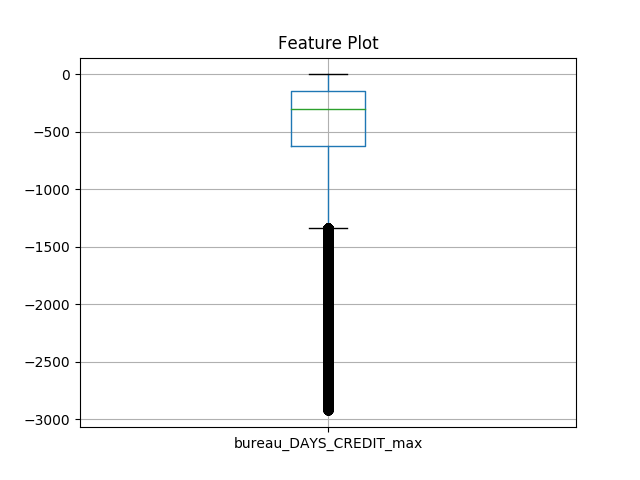

In [8]:
%%python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pyData = spark.sql("select int(*) from dfBox ").toPandas()
print(pyData.describe())
from IPython.display import Image
import tempfile
plt.clf()
pyData.boxplot()
plt.title("Feature Plot")
with tempfile.NamedTemporaryFile(suffix=".png") as fo:
    plt.savefig(fo.name)
    retval = Image(filename=fo.name)

## reviewing data values for inconsistencies:

In [13]:
// define function to display summary statistics of specified feature

def incon (df:org.apache.spark.sql.DataFrame ,feature:org.apache.spark.sql.Column) {
    val f1 = df.select(feature)
    
    // data is in DataType String - convert to Float to faciltate 
    // computation of summary statistics
    val f2 = f1.withColumn(f1.columns.mkString, f1.col(
        f1.columns.mkString).cast(DataTypes.FloatType))
    f2.summary().show()
    val f3 = f2.na.drop()
    f3.sort(desc(f3.columns.mkString)).show(10)
    f3.sort(asc(f3.columns.mkString)).show(10)
}

incon: (df: org.apache.spark.sql.DataFrame, feature: org.apache.spark.sql.Column)Unit


In [14]:
// Randomly review 20 features for inconsistencies [Joel]

val r = scala.util.Random
var i:Int = 0
var randomlist = new Array[String](0)
while (i < 20){
    randomlist = randomlist :+ creditRiskFeatures(r.nextInt(creditRiskFeatures.length))
    i += 1}

for (i <- randomlist){
    incon(creditRiskdf,creditRiskdf(i))
}

+-------+------------------------------+
|summary|NAME_INCOME_TYPE_State servant|
+-------+------------------------------+
|  count|                        307511|
|   mean|           0.07057633710664009|
| stddev|           0.25611624520599924|
|    min|                           0.0|
|    25%|                           0.0|
|    50%|                           0.0|
|    75%|                           0.0|
|    max|                           1.0|
+-------+------------------------------+

+------------------------------+
|NAME_INCOME_TYPE_State servant|
+------------------------------+
|                           1.0|
|                           1.0|
|                           1.0|
|                           1.0|
|                           1.0|
|                           1.0|
|                           1.0|
|                           1.0|
|                           1.0|
|                           1.0|
+------------------------------+
only showing top 10 rows

+------------------

+------------------------------------------------------+
|client_cash_NAME_CONTRACT_STATUS_Active_count_norm_max|
+------------------------------------------------------+
|                                                   0.0|
|                                                   0.0|
|                                                   0.0|
|                                                   0.0|
|                                                   0.0|
|                                                   0.0|
|                                                   0.0|
|                                                   0.0|
|                                                   0.0|
|                                                   0.0|
+------------------------------------------------------+
only showing top 10 rows

+-------+---------------------------------+
|summary|previous_loans_DAYS_DECISION_mean|
+-------+---------------------------------+
|  count|                           291057|



+------------------------------------------------------+
|previous_loans_NAME_CASH_LOAN_PURPOSE_Other_count_norm|
+------------------------------------------------------+
|                                                   1.0|
|                                                   1.0|
|                                                   1.0|
|                                                   1.0|
|                                                   1.0|
|                                                   1.0|
|                                                   1.0|
|                                                   1.0|
|                                                   1.0|
|                                                   1.0|
+------------------------------------------------------+
only showing top 10 rows

+------------------------------------------------------+
|previous_loans_NAME_CASH_LOAN_PURPOSE_Other_count_norm|
+------------------------------------------------------+
|   


+--------------------------------------------------+
|previous_loans_NAME_PRODUCT_TYPE_x-sell_count_norm|
+--------------------------------------------------+
|                                               1.0|
|                                               1.0|
|                                               1.0|
|                                               1.0|
|                                               1.0|
|                                               1.0|
|                                               1.0|
|                                               1.0|
|                                               1.0|
|                                               1.0|
+--------------------------------------------------+
only showing top 10 rows

+--------------------------------------------------+
|previous_loans_NAME_PRODUCT_TYPE_x-sell_count_norm|
+--------------------------------------------------+
|                                               0.0|
|                  


+---------------------------------------------+
|client_bureau_balance_STATUS_X_count_norm_max|
+---------------------------------------------+
|                                          0.0|
|                                          0.0|
|                                          0.0|
|                                          0.0|
|                                          0.0|
|                                          0.0|
|                                          0.0|
|                                          0.0|
|                                          0.0|
|                                          0.0|
+---------------------------------------------+
only showing top 10 rows

+-------+----------------------------+
|summary|bureau_DAYS_ENDDATE_FACT_min|
+-------+----------------------------+
|  count|                      230355|
|   mean|         -1467.3387771049033|
| stddev|           792.3107008640327|
|    min|                    -42023.0|
|    25%|                   

r: util.Random.type = scala.util.Random$@31f8dabf
i: Int = 20
randomlist: Array[String] = Array(NAME_INCOME_TYPE_State servant, client_credit_AMT_CREDIT_LIMIT_ACTUAL_max_sum, previous_loans_NAME_CLIENT_TYPE_New_count_norm, OCCUPATION_TYPE_High skill tech staff, client_cash_NAME_CONTRACT_STATUS_Active_count_norm_max, previous_loans_DAYS_DECISION_mean, previous_loans_SELLERPLACE_AREA_min, client_bureau_balance_STATUS_0_count_norm_mean, client_credit_SK_DPD_mean_mean, previous_loans_NAME_CASH_LOAN_PURPOSE_Other_count_norm, client_credit_AMT_PAYMENT_TOTAL_CURRENT_max_max, previous_loans_DAYS_FIRST_DUE_sum, bureau_AMT_ANNUITY_max, AMT_INCOME_TOTAL, previous_loans_NAME_PRODUCT_TYPE_x-sell_count_norm, WEEKDAY_APPR_PROCESS_START_WEDNESDAY, previous_loans_DAYS_DECISION_sum, client_credit_AMT_CRE...

In [ ]:
/* take a closer look at some features with potential inconsistencies
- previous_loans_DAYS_FIRST_DUE_mean
- previous_loans_SELLERPLACE_AREA_min
- previous_loans_DAYS_FIRST_DUE_sum
*/

In [16]:
// Investigate feature "previous_loans_DAYS_FIRST_DUE_mean"

val f1 = creditRiskdf.select("previous_loans_DAYS_FIRST_DUE_mean")
val f2 = f1.withColumn(f1.columns.mkString, f1.col(
    f1.columns.mkString).cast(DataTypes.FloatType))
// f2.summary().show()
val f3 = f2.na.drop()
// f3.sort(desc(f3.columns.mkString)).show(10)
// f3.sort(asc(f3.columns.mkString)).show(10)
f3.filter($"previous_loans_DAYS_FIRST_DUE_mean" === 365243).count()

f1: org.apache.spark.sql.DataFrame = [previous_loans_DAYS_FIRST_DUE_mean: string]
f2: org.apache.spark.sql.DataFrame = [previous_loans_DAYS_FIRST_DUE_mean: float]
f3: org.apache.spark.sql.DataFrame = [previous_loans_DAYS_FIRST_DUE_mean: float]
res6: Long = 530


In [18]:
// Investigate feature "previous_loans_SELLERPLACE_AREA_min"

val f1 = creditRiskdf.select("previous_loans_SELLERPLACE_AREA_min")
val f2 = f1.withColumn(f1.columns.mkString, f1.col(
    f1.columns.mkString).cast(DataTypes.FloatType))
// f2.summary().show()
val f3 = f2.na.drop()
// f3.sort(desc(f3.columns.mkString)).show(10)
// f3.sort(asc(f3.columns.mkString)).show(10)
f3.filter($"previous_loans_SELLERPLACE_AREA_min" < 0).count()

f1: org.apache.spark.sql.DataFrame = [previous_loans_SELLERPLACE_AREA_min: string]
f2: org.apache.spark.sql.DataFrame = [previous_loans_SELLERPLACE_AREA_min: float]
f3: org.apache.spark.sql.DataFrame = [previous_loans_SELLERPLACE_AREA_min: float]
res8: Long = 163911


Action: Values for this feature is inconsistent. "SELLERPLACE_AREA" should not be negative but this feature contains 163,911 lines of values < 0.  Will drop this feature from the dataset.

// Investigate feature "previous_loans_DAYS_FIRST_DUE_sum"

Action: Similar to feature "previous_loans_DAYS_FIRST_DUE_mean". This has both +ve and -ve values when there should only be one convention. Will drop this feature from the dataset.

In [23]:
// Drop features with inconsistent values from dataset.

val incon_droplist = List("previous_loans_DAYS_FIRST_DUE_mean",
                      "previous_loans_SELLERPLACE_AREA_min",
                      "previous_loans_DAYS_FIRST_DUE_sum")

val df_lessInconData = creditRiskdf.drop(incon_droplist:_*)

incon_droplist: List[String] = List(previous_loans_DAYS_FIRST_DUE_mean, previous_loans_SELLERPLACE_AREA_min, previous_loans_DAYS_FIRST_DUE_sum)
df_lessInconData: org.apache.spark.sql.DataFrame = [EXT_SOURCE_1: string, EXT_SOURCE_2: string ... 356 more fields]


## data formatting:

In [ ]:
//iterate through features and apply the describe method and append to new dataframe
//secondary to this iterate through the values in the features and get datatypes, sql query this output for unique values

In [8]:
// find out if there are data in date formats [Joel]
// filter column headers containing 'date' for further investigation
val matcher = ".+date.+"
val dates = creditRiskFeatures.filter(x => x.toLowerCase matches matcher)

matcher: String = .+date.+
dates: Array[String] = Array(bureau_DAYS_CREDIT_ENDDATE_max, bureau_DAYS_ENDDATE_FACT_max, bureau_DAYS_CREDIT_UPDATE_max, bureau_DAYS_CREDIT_ENDDATE_mean, bureau_DAYS_ENDDATE_FACT_min, bureau_DAYS_CREDIT_ENDDATE_min, bureau_DAYS_CREDIT_ENDDATE_sum, bureau_DAYS_CREDIT_UPDATE_min, bureau_DAYS_ENDDATE_FACT_mean, bureau_DAYS_CREDIT_UPDATE_mean)


In [9]:
// review data format of columnbs with headers containing 'date' [Joel]
for (dateformat <- dates){
creditRiskdf.select(dateformat).show(10)
}

2019-05-25 15:23:47,502 WARN  [Thread-4] util.Utils (Logging.scala:logWarning(66)) - Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.debug.maxToStringFields' in SparkEnv.conf.
+------------------------------+
|bureau_DAYS_CREDIT_ENDDATE_max|
+------------------------------+
|                         780.0|
|                        1216.0|
|                        -382.0|
|                          null|
|                        -783.0|
|                         471.0|
|                        1402.0|
|                         689.0|
|                        -860.0|
|                          null|
+------------------------------+
only showing top 10 rows

+----------------------------+
|bureau_DAYS_ENDDATE_FACT_max|
+----------------------------+
|                       -36.0|
|                      -540.0|
|                      -382.0|
|                        null|
|                      -783.0|
|                 

## Encoding categorical variables:

In [ ]:
//this has already been done for this dataset. No additional work required.